# Problem Statement:
To use the available dataset which contains all the necessary data to train a regression model for estimating the delivery time using all the available features.

# 1. Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
import itertools
import sys
import warnings
import io

# 2. Set Options

In [ ]:
warnings.simplefilter('ignore')
pd.set_option("display.max_columns", None)
pd.options.display.float_format = '{:.2f}'.format
sns.set_style('white')

# 3. Read Data

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving dataset.csv to dataset.csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['dataset.csv']))
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,1.00,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.00,4,3441,4,557,1239,33.00,14.00,21.00
1,2.00,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.00,1,1900,1,1400,1400,1.00,2.00,2.00
2,3.00,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,NaN,1.00,1,1900,1,1900,1900,1.00,0.00,0.00
3,3.00,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,NaN,1.00,6,6900,5,600,1800,1.00,1.00,2.00
4,3.00,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,NaN,1.00,3,3900,3,1100,1600,6.00,6.00,9.00


# 4. Exploratory Data Analysis

### 4.1 Basic Metrics

In [ ]:
# Shape of the dataset -
df.shape

(197428, 14)

In [ ]:
# basic info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 196441 non-null  float64
 1   created_at                197428 non-null  object 
 2   actual_delivery_time      197421 non-null  object 
 3   store_id                  197428 non-null  object 
 4   store_primary_category    192668 non-null  object 
 5   order_protocol            196433 non-null  float64
 6   total_items               197428 non-null  int64  
 7   subtotal                  197428 non-null  int64  
 8   num_distinct_items        197428 non-null  int64  
 9   min_item_price            197428 non-null  int64  
 10  max_item_price            197428 non-null  int64  
 11  total_onshift_partners    181166 non-null  float64
 12  total_busy_partners       181166 non-null  float64
 13  total_outstanding_orders  181166 non-null  f

In [ ]:
#statistical summary
df.describe()

,market_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
count,196441.00,196433.00,197428.00,197428.00,197428.00,197428.00,197428.00,181166.00,181166.00,181166.00
mean,2.98,2.88,3.20,2682.33,2.67,686.22,1159.59,44.81,41.74,58.05
std,1.52,1.50,2.67,1823.09,1.63,522.04,558.41,34.53,32.15,52.66
min,1.00,1.00,1.00,0.00,1.00,-86.00,0.00,-4.00,-5.00,-6.00
25%,2.00,1.00,2.00,1400.00,1.00,299.00,800.00,17.00,15.00,17.00
50%,3.00,3.00,3.00,2200.00,2.00,595.00,1095.00,37.00,34.00,41.00
75%,4.00,4.00,4.00,3395.00,3.00,949.00,1395.00,65.00,62.00,85.00
max,6.00,7.00,411.00,27100.00,20.00,14700.00,14700.00,171.00,154.00,285.00


In [ ]:
#Number of Unique Value in each column
df.nunique()

market_id                        6
created_at                  180985
actual_delivery_time        178110
store_id                      6743
store_primary_category          74
order_protocol                   7
total_items                     57
subtotal                      8368
num_distinct_items              20
min_item_price                2312
max_item_price                2652
total_onshift_partners         172
total_busy_partners            159
total_outstanding_orders       281
dtype: int64

### 4.2 Conversion of Data Types

In [ ]:
# converting dattime columns into right format
df.created_at = pd.to_datetime(df.created_at)
df.actual_delivery_time = pd.to_datetime(df.actual_delivery_time)

### 4.3 Handling Null Values

In [ ]:
# understanding missing value count by percentage in df
missing_value = pd.DataFrame({
    'Missing Value': df.isnull().sum(),
    'Percentage': (df.isnull().sum() / len(df))*100
})
missing_value.sort_values(by='Percentage', ascending=False)

,Missing Value,Percentage
total_onshift_partners,16262,8.24
total_busy_partners,16262,8.24
total_outstanding_orders,16262,8.24
store_primary_category,4760,2.41
order_protocol,995,0.50
market_id,987,0.50
actual_delivery_time,7,0.00
created_at,0,0.00
store_id,0,0.00
total_items,0,0.00


Dropping rows where market_id, actual_delivery_time and store_primary_category is null as its a very small subset of the dataset.

In [ ]:
df.dropna(subset=['market_id','actual_delivery_time','store_primary_category'],how='any',axis=0,inplace=True)

Filling null values with median values by grouping on market_id for the columns 'total_onshift_partners','total_busy_partners','total_outstanding_orders','order_protocol'.

In [ ]:
for i in ['total_onshift_partners','total_busy_partners','total_outstanding_orders','order_protocol']:
    df[i] = df.groupby(['market_id'],sort=False)[i].apply(lambda x: x.fillna(x.median()))

### 4.4 Feature Engineering

In [ ]:
# Creating the target column
df['delivery_time'] = (df['actual_delivery_time'] - df['created_at']).dt.total_seconds().div(60)

In [ ]:
# getting hour of day 
df['hour_of_day'] = df.created_at.dt.hour

In [ ]:
# getiing day of week
df['day_of_week'] = df.created_at.dt.dayofweek

In [ ]:
# removing unwanted columns
df.drop(['store_id','store_primary_category','created_at','actual_delivery_time'],axis=1,inplace=True)

# 5 Visualization and Outlier detection - treatment

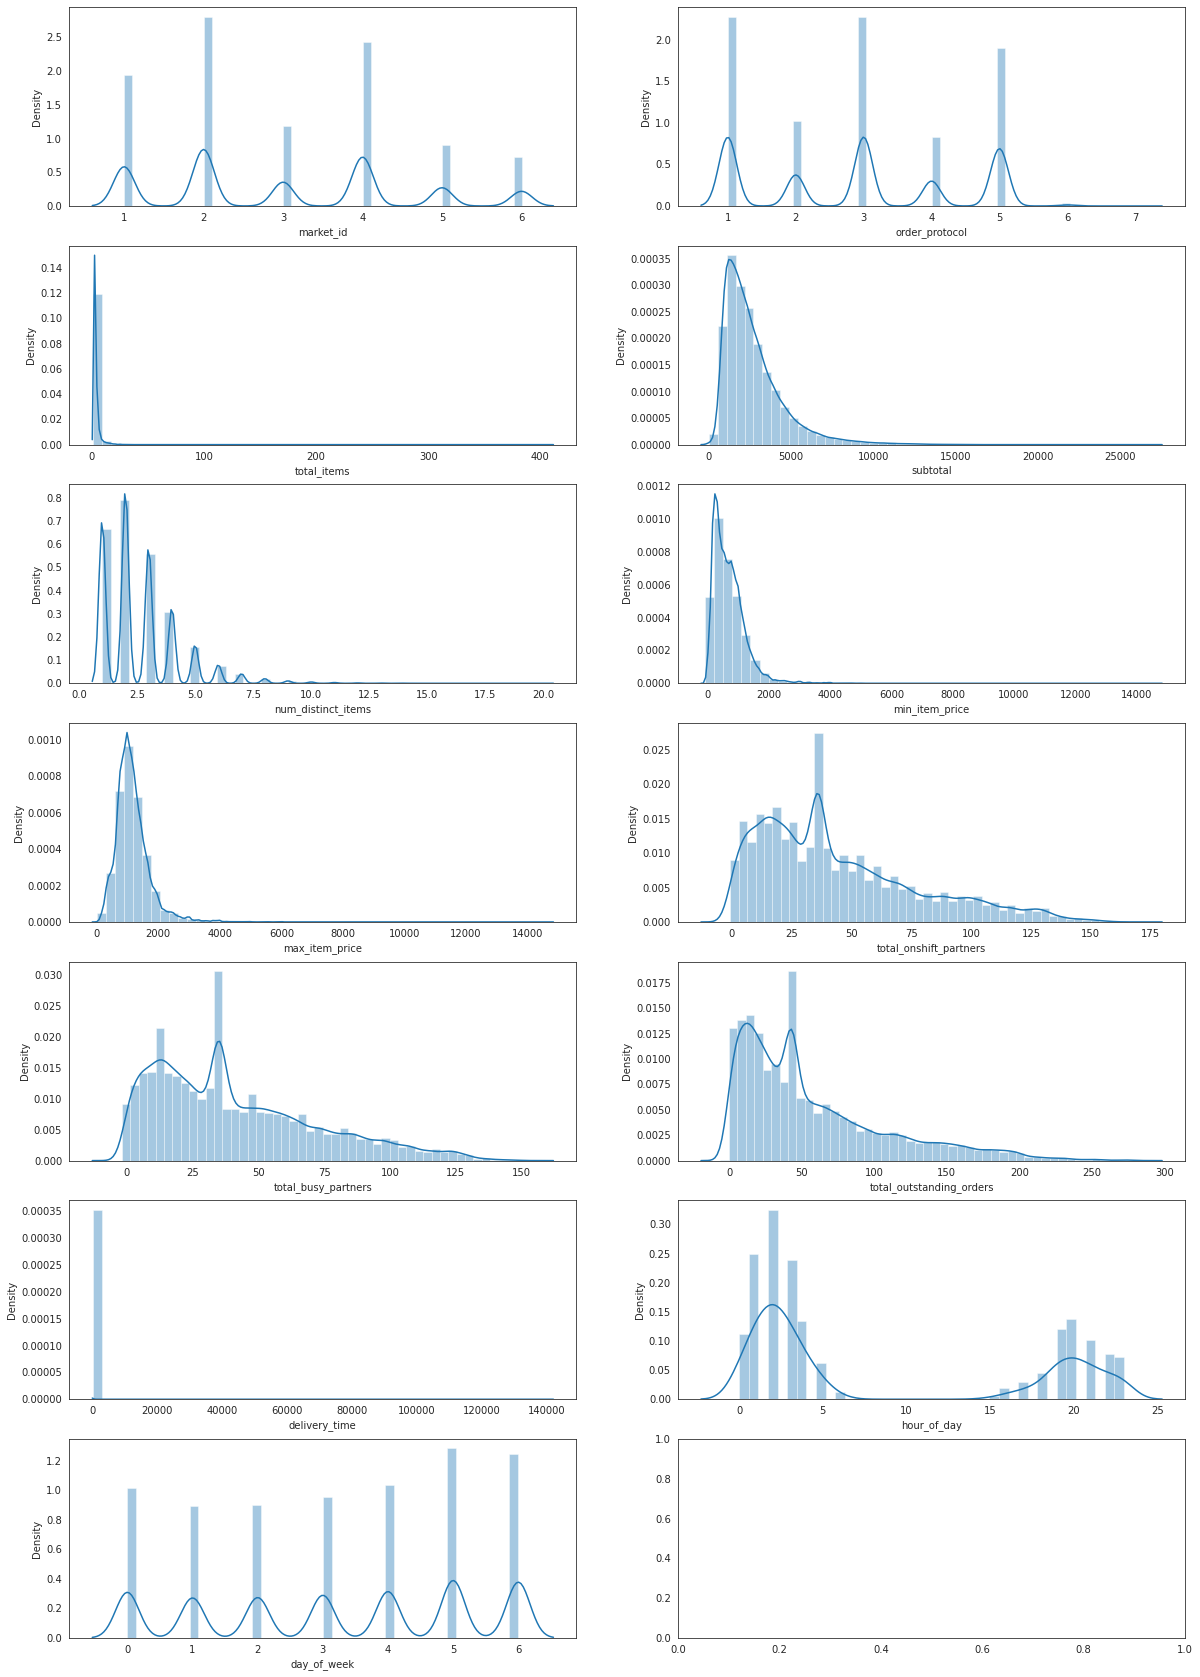

In [ ]:
#distplot for Continuous Variables
fig,axes =plt.subplots(7,2,figsize=(20, 30))
cols=df.columns
for x in range(len(cols)):
    p=sns.distplot(df[cols[x]],ax=axes[x//2,x%2])

In [ ]:
# A broader look at correlation between the columns of dataframe
df.corr()

,market_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,delivery_time,hour_of_day,day_of_week
market_id,1.00,-0.02,-0.00,-0.02,0.00,-0.00,-0.01,0.03,0.02,0.02,-0.01,-0.01,-0.00
order_protocol,-0.02,1.00,0.01,-0.05,-0.02,-0.05,-0.09,0.15,0.15,0.14,-0.01,0.01,-0.00
total_items,-0.00,0.01,1.00,0.56,0.76,-0.39,-0.06,0.03,0.03,0.03,0.00,-0.07,0.02
subtotal,-0.02,-0.05,0.56,1.00,0.68,0.04,0.51,0.13,0.12,0.13,0.01,-0.18,0.03
num_distinct_items,0.00,-0.02,0.76,0.68,1.00,-0.45,0.04,0.06,0.06,0.07,0.01,-0.11,0.03
min_item_price,-0.00,-0.05,-0.39,0.04,-0.45,1.00,0.54,0.04,0.04,0.04,0.00,-0.05,-0.00
max_item_price,-0.01,-0.09,-0.06,0.51,0.04,0.54,1.00,0.13,0.13,0.13,0.01,-0.19,0.03
total_onshift_partners,0.03,0.15,0.03,0.13,0.06,0.04,0.13,1.00,0.94,0.94,0.00,-0.36,0.10
total_busy_partners,0.02,0.15,0.03,0.12,0.06,0.04,0.13,0.94,1.00,0.93,0.00,-0.33,0.08
total_outstanding_orders,0.02,0.14,0.03,0.13,0.07,0.04,0.13,0.94,0.93,1.00,0.01,-0.35,0.08


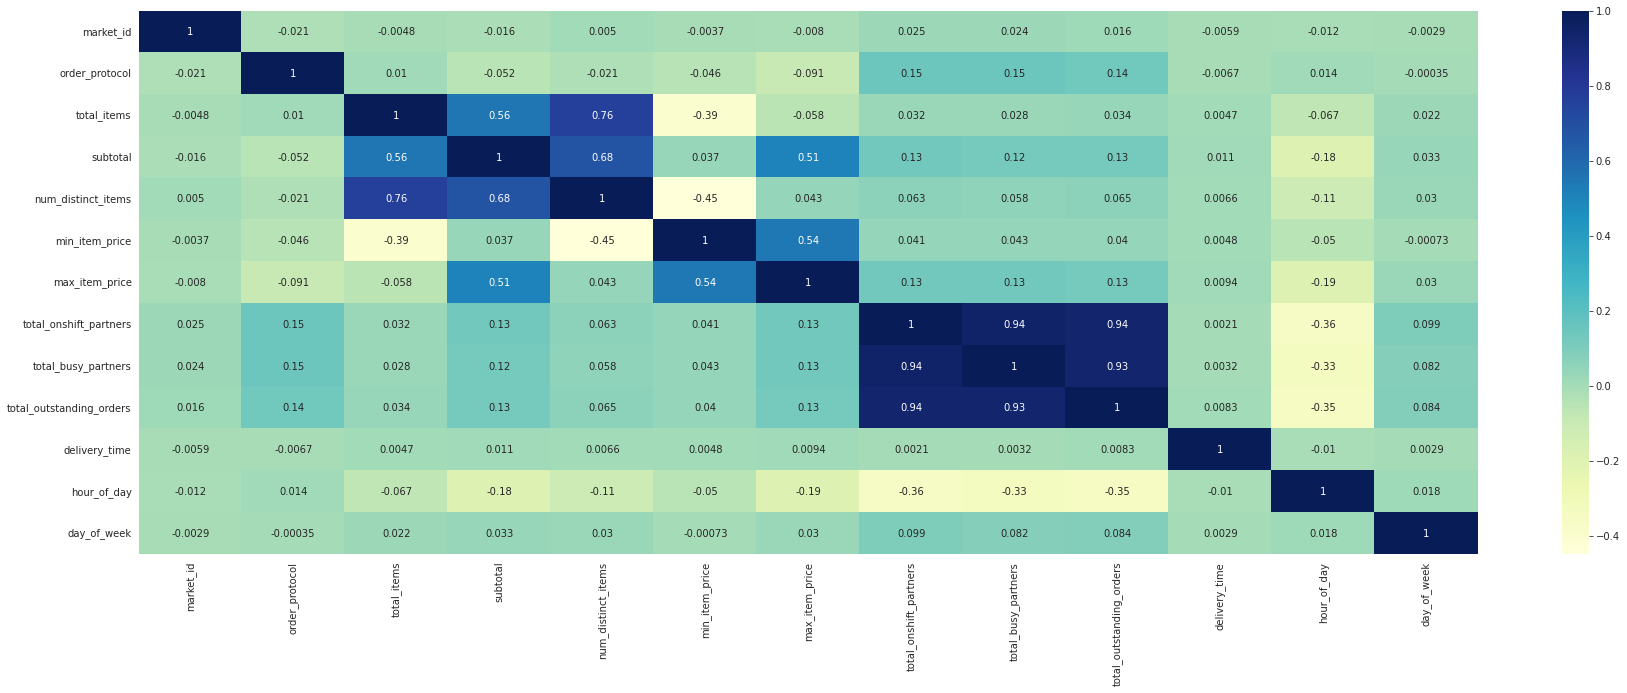

In [ ]:
# Correlation Plot above as a Heatmap -
plt.figure(figsize=(30,10))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

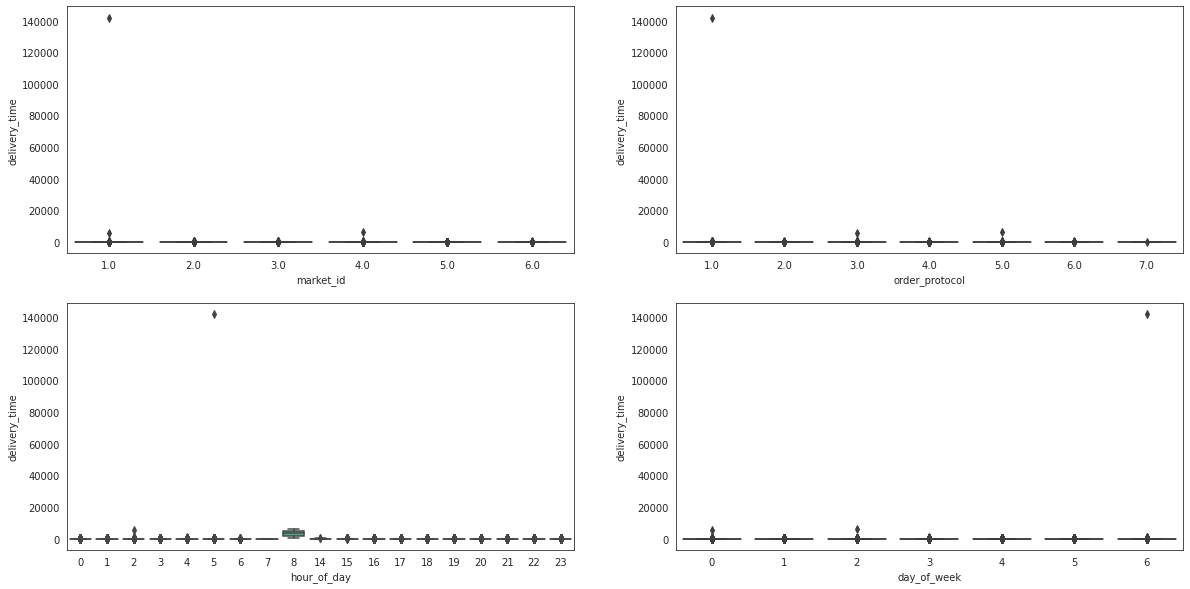

In [ ]:
#Boxplot for all categorical columns with target variable
#Outliers detetion
fig,axes =plt.subplots(2,2,figsize=(20, 10))
cols=['market_id', 'order_protocol', 'hour_of_day', 'day_of_week']
for x in range(len(cols)):
    p=sns.boxplot(df[cols[x]],df['delivery_time'],ax=axes[x//2,x%2])

In [ ]:
# outlier detection using z-score method
z_scores = stats.zscore(df.select_dtypes(include=[np.float64, np.int64],exclude=np.datetime64))
abs_z_scores = np.abs(z_scores)

In [ ]:
# outlier treatment based on z-score
filtered_entries = (abs_z_scores < 3).all(axis=1)
df = df[filtered_entries]

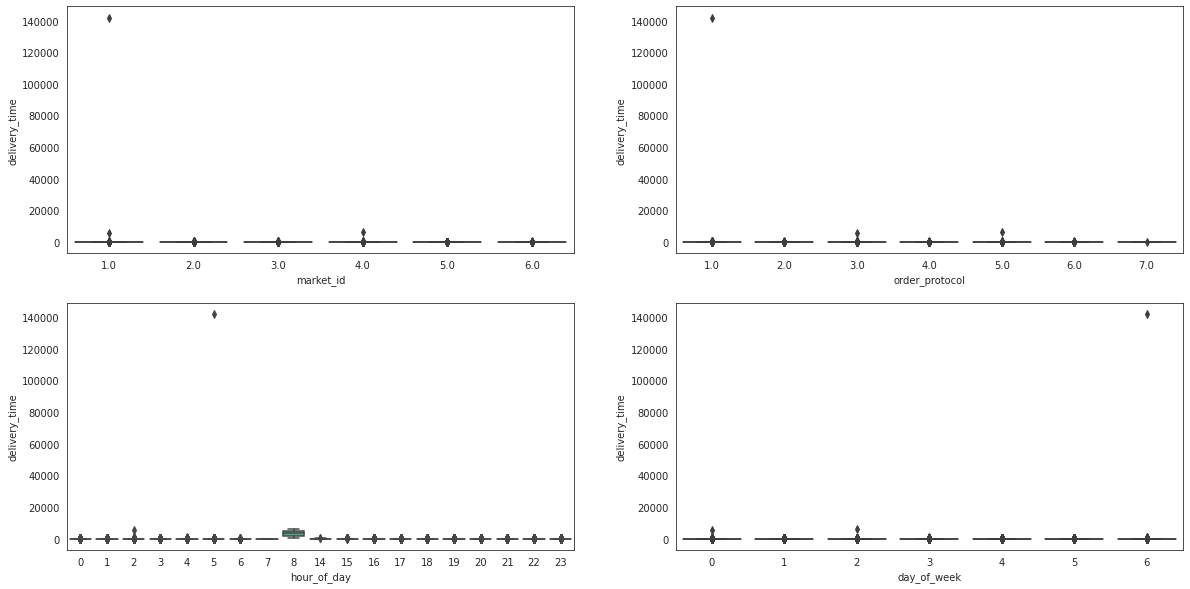

In [ ]:
#Boxplot for all categorical columns with target variable after removal of outliers
#Outliers detetion
fig,axes =plt.subplots(2,2,figsize=(20, 10))
cols=['market_id', 'order_protocol', 'hour_of_day', 'day_of_week']
for x in range(len(cols)):
    p=sns.boxplot(df[cols[x]],df['delivery_time'],ax=axes[x//2,x%2])

# 6. Model training with random forest

In [ ]:
# make a copy of original dataframe
df_copy = df.copy()

In [ ]:
# Split the data into training and testing sets
X = df_copy.drop('delivery_time', axis=1)  # Features
y = df['delivery_time']               # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create a baseline random forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Predict on the test set
y_pred = rf.predict(X_test)

In [ ]:
# Calculate various metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

MSE: 307.2448983606968
RMSE: 17.528402618627197
MAE: 11.761382382373315


# 7. Regression with neural networks

In [ ]:
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Define the model architecture
model = keras.Sequential([
    keras.layers.Dense(units=32, activation='relu', input_shape=[X_train.shape[1]]),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(units=1, activation='linear')
])

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [ ]:
# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, validation_data=(X_test_scaled, y_test))

Epoch 1/100
4485/4485 [==============================] - 20s 4ms/step - loss: 358.1883 - mae: 12.9335 - val_loss: 318.9522 - val_mae: 11.9701
Epoch 2/100
4485/4485 [==============================] - 17s 4ms/step - loss: 308.7451 - mae: 12.0134 - val_loss: 314.9410 - val_mae: 12.1123
Epoch 3/100
4485/4485 [==============================] - 20s 4ms/step - loss: 305.9739 - mae: 11.9448 - val_loss: 312.0531 - val_mae: 11.8969
Epoch 4/100
4485/4485 [==============================] - 17s 4ms/step - loss: 304.4801 - mae: 11.9054 - val_loss: 314.5353 - val_mae: 11.7392
Epoch 5/100
4485/4485 [==============================] - 17s 4ms/step - loss: 303.6179 - mae: 11.8826 - val_loss: 310.0574 - val_mae: 11.8004
Epoch 6/100
4485/4485 [==============================] - 18s 4ms/step - loss: 302.7340 - mae: 11.8675 - val_loss: 311.9454 - val_mae: 11.6980
Epoch 7/100
4485/4485 [==============================] - 17s 4ms/step - loss: 301.8613 - mae: 11.8462 - val_loss: 310.5702 - val_mae: 12.0375
Epoch 

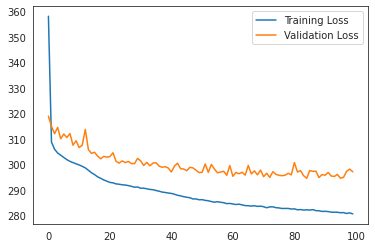

In [ ]:
# Plot the training and validation loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [ ]:
# Evaluate the model on the testing data
test_loss = model.evaluate(X_test_scaled, y_test)

# Compute the MAE, MSE, and RMSE
test_predictions = model.predict(X_test_scaled).flatten()
test_mae = mean_absolute_error(y_test, test_predictions)
test_mse = mean_squared_error(y_test, test_predictions)
test_rmse = np.sqrt(test_mse)

# Print the evaluation metrics
print('Test Loss:', test_loss)
print('Test MAE:', test_mae)
print('Test MSE:', test_mse)
print('Test RMSE:', test_rmse)

1122/1122 [==============================] - 6s 5ms/step
Test Loss: [297.0880432128906, 11.37778091430664]
Test MAE: 11.377779687270674
Test MSE: 297.0880957175444
Test RMSE: 17.23624366611079


After trying different combinations and hyperparameters, we can observe that metrics are better for neural network in comparison to base line random forest model.

# 8. Questionnaire

1) Defining the problem statements and where can this and modifications of this be used?
- To use the available dataset which contains all the necessary data to train a regression model for estimating the delivery time using all the available features.
- The process of training a regression model for delivery time estimation can be used in a variety of industries that involve shipping or transportation, such as e-commerce, logistics, and supply chain management.
- These techniques can be used in a variety of industries, such as finance, healthcare, and manufacturing, to solve problems related to prediction and forecasting.

2) List 3 functions the pandas datetime provides with one line explanation.
- to_datetime(): Converts the input argument to a datetime object.
- dt.day_name(): Returns the day of the week as a string for each date in the datetime series.
- dt.total_seconds(): Returns the total number of seconds in the time span represented by each datetime object in the series.

3) Short note on datetime, timedelta, time span (period).
- Datetime, timedelta, and time span (period) are related concepts in Python that are commonly used in data analysis and time series modeling.
- Datetime is a Python module that provides classes for working with dates, times, and date/time combinations. Datetime objects allow you to perform various operations on dates and times, such as arithmetic operations, date/time formatting and parsing, and time zone handling.
- Timedelta is another Python module that provides a way to represent a duration of time. Timedelta objects can be used to perform arithmetic operations on datetime objects, such as adding or subtracting days, hours, minutes, or seconds.
- Time span or period is a term used in time series analysis to refer to a fixed interval of time. For example, a period might represent a month, a quarter, or a year. Period objects in Python can be used to perform operations on time spans, such as resampling or aggregating data over a certain period of time.
- In summary, datetime, timedelta, and time span are all important concepts in Python for working with dates and times, and they provide a powerful set of tools for analyzing time series data.

4) Why do we need to check for outliers in our data?
- Checking for outliers in our data is an important step in data preprocessing and analysis. Outliers are data points that are significantly different from the other observations in the dataset. These observations may be caused by measurement or data entry errors, or they may be legitimate extreme values that represent rare events or phenomena. There are several reasons why we need to check for outliers in our data:

  ->They can skew statistical analysis: Outliers can significantly impact the mean, median, and standard deviation of a dataset. This can lead to biased or inaccurate statistical analysis, such as incorrect parameter estimates or hypothesis testing results.

  ->They can affect machine learning models: Outliers can also negatively impact the performance of machine learning models. Models such as linear regression, which assume a normal distribution of data, can be significantly impacted by outliers.

  -> They can provide valuable insights: Outliers can also be important in identifying rare events or phenomena that may be of interest to researchers. For example, in medical research, outliers may represent unique cases that require further investigation.

- In summary, checking for outliers is important because they can have a significant impact on data analysis and machine learning models, and can provide valuable insights into unique events or phenomena in the data.

5) Name 3 outlier removal methods?
- Here are three common methods for outlier removal:

  -> Z-score method: This method identifies outliers that lie beyond a certain number of standard deviations from the mean of the dataset.

  -> IQR method: This method uses the interquartile range to identify outliers. It calculates the difference between the 75th percentile and the 25th percentile of the data and then uses this value to define a threshold for identifying outliers.

  -> Local Outlier Factor (LOF) method: This method is based on the concept of nearest neighbors. It identifies outliers by looking for data points that have significantly fewer neighbors than the other points in the dataset.

6) What classical machine learning methods can we use other than random forest for regression?
- There are many classical machine learning methods that can be used for regression other than Random Forest. Here are a few examples:

  -> Linear regression: This is a simple and widely used method that models the relationship between the input features and output variable with a linear equation.

  -> Support Vector Regression (SVR): This method uses support vector machines (SVMs) to perform regression. It is particularly useful when dealing with nonlinear relationships.

  -> Gradient Boosting: This method involves iteratively adding new models to the ensemble to correct the errors made by the previous models. It can be used for both regression and classification tasks.

  -> Neural Networks: Neural networks are powerful models that can capture complex relationships between input features and output variables. They can be used for both regression and classification tasks.

  -> k-Nearest Neighbors (k-NN): This method involves finding the k nearest data points to a given input and using their output values to predict the output for the new data point. It is a simple but effective method for regression.

7) Why is scaling required for neural networks?
- Scaling is required for neural networks because it helps to normalize the input data and put it on a similar scale, so that the model can learn effectively from the data. Without scaling, the features with larger values can dominate the smaller ones, causing the model to be biased towards those features. This can result in poor model performance, as the model may not be able to effectively learn the relationships between the features and the target variable. 
- Scaling helps to ensure that each feature is given equal importance and that the model can learn from all the features in a fair and balanced way. This can lead to improved model accuracy and better generalization to new data. Some common scaling techniques used for neural networks include StandardScaler, MinMaxScaler, and RobustScaler.

8) Briefly explain your choice of optimizer.
- I have used the Adam optimizer for training the neural network. Adam is a popular optimization algorithm for deep learning models and is an extension of the stochastic gradient descent (SGD) algorithm.

- Adam combines the advantages of two other popular optimization methods - AdaGrad and RMSProp. It uses adaptive learning rates for each weight parameter in the neural network, which means that it adjusts the learning rate based on the historical gradients. This helps to speed up the training process and can lead to better convergence to a global minimum.

- Adam also includes momentum, which helps to speed up the training process by accumulating gradients over time and moving in the direction of the overall gradient. This helps to avoid getting stuck in local minima and can lead to better generalization to new data.

- Overall, Adam is a good choice for training neural networks due to its ability to handle sparse gradients, fast convergence, and good generalization performance.

9) Which activation function did you use and why?
- I used the ReLU (Rectified Linear Unit) activation function for the hidden layers and a linear activation function for the output layer. The ReLU function is commonly used in neural networks because it is simple, computationally efficient, and has been shown to work well in practice. It also helps to prevent the vanishing gradient problem which can occur with other activation functions like sigmoid or tanh. The linear activation function for the output layer is appropriate for regression tasks where we are predicting continuous numerical values.

10) Why does a neural network perform well on a large dataset?
- A neural network can perform well on a large dataset for several reasons:

  ->Neural networks are capable of learning complex relationships between input features and output targets. With a large dataset, a neural network has more examples to learn from, which can help it to better generalize to new data.

  ->Neural networks are highly parallelizable and can be trained efficiently on large datasets using GPU hardware. This allows for faster training times and the ability to process large amounts of data in a reasonable amount of time.

  ->Neural networks can automatically extract relevant features from the input data through a process called feature learning. With a large dataset, the network can learn more nuanced and detailed features, which can improve its performance on the task.

  ->Neural networks can also be designed with many layers, allowing for more complex and hierarchical representations of the input data. With a large dataset, a deeper neural network can capture more abstract and high-level representations of the data, which can help it to perform well on the task.
